# Maize Prediction Model




# Business Understanding

## **Background:**
The agriculture sector is a vital part of many economies, especially in developing countries where it serves as the primary source of income for a large portion of the population. Maize is one of the most significant staple crops worldwide, providing food security and serving as a primary source of income for farmers. However, maize prices are highly volatile, influenced by various factors such as weather conditions, market demand, supply chain disruptions, and seasonal changes. Accurate price prediction can help stakeholders in the agricultural value chain, including farmers, traders, and policymakers, make informed decisions.

## **Objective:**
The primary objective of this project is to develop a predictive model that forecasts maize prices with a high degree of accuracy. By analyzing historical data and considering various influencing factors like market location, seasonality, supply volume, and other relevant variables, the model aims to provide reliable price predictions. These predictions can assist stakeholders in optimizing their decision-making processes, such as determining the best time to sell or buy maize, managing inventory, and planning future planting strategies.

## **Stakeholders:**
- **Farmers:** Can use the price predictions to decide the optimal time to sell their maize, maximizing their profits.
- **Traders:** Can make informed decisions on buying and selling maize, optimizing their supply chain management.
- **Policymakers:** Can use the insights from the model to develop policies that stabilize maize prices and ensure food security.
- **Agricultural Advisors and NGOs:** Can provide better advice and support to farmers based on the predicted prices.

## **Business Value:**
1. **Price Stability:** By predicting maize prices, the model can help reduce price volatility, benefiting both producers and consumers.
2. **Increased Profit Margins:** Farmers and traders can make more informed decisions, leading to better pricing strategies and potentially higher profits.
3. **Risk Management:** The model can help stakeholders anticipate and mitigate risks associated with price fluctuations.
4. **Resource Optimization:** Farmers can plan their planting and harvesting schedules more effectively, leading to better resource allocation and reduced waste.

## **Key Success Criteria:**
- **Accuracy:** The model should have a high prediction accuracy, reducing the margin of error in price forecasts.
- **Usability:** The model should be user-friendly, allowing stakeholders with varying levels of technical expertise to access and understand the predictions.
- **Scalability:** The model should be adaptable to other crops and regions, allowing for broader applications across the agricultural sector.
- **Timeliness:** The predictions should be generated in a timely manner, allowing stakeholders to act on the information promptly.

## **Challenges:**
- **Data Availability:** Ensuring access to high-quality, relevant data, including historical prices, weather patterns, and market conditions, is crucial for accurate predictions.
- **Market Dynamics:** The model must account for unpredictable factors such as political instability, sudden market changes, and global economic trends that can impact maize prices.
- **Model Interpretability:** The model should be interpretable, allowing stakeholders to understand the rationale behind the predictions.


# Data Understanding

## **Data Source:**
The data used for this maize price prediction model was sourced from the Ministry of Agriculture and Livestock Development's Agricultural Market Information System (KAMIS) website. This dataset provides a comprehensive view of various factors influencing maize prices in different regions.

### **Data Columns:**
1. **Commodity:**
   - **Description:** Represents the type of maize 

   - **Importance:** Helps identify the specific maize being analyzed, especially because we have several different types of maize.

2. **Classification:**
   - **Description:** Specifies the category or type of maize, such as yellow or white maize.
   - **Importance:** Different classifications of maize may have different market values, affecting the accuracy of price predictions.

3. **Grade:**
   - **Description:** Indicates the quality of the maize, which can range from high to low grades.
   - **Importance:** The grade of maize is directly related to its price; higher-grade maize typically fetches higher prices.

4. **Sex:**
   - **Description:** Refers to the gender of the market participants involved, which could include details on whether the buyer or seller is male or female.
   - **Importance:** While this may seem unrelated, it can provide insights into market dynamics and purchasing behavior, potentially influencing price trends.

5. **Market:**
   - **Description:** Specifies the market location where the maize is being sold.
   - **Importance:** Different markets may have varying demand and supply conditions, leading to price variations.

6. **Wholesale:**
   - **Description:** The wholesale price of maize in the specified market.
   - **Importance:** Wholesale prices are a key factor in understanding market trends and predicting future retail prices.

7. **Retail:**
   - **Description:** The retail price of maize in the specified market.
   - **Importance:** Retail prices are crucial for understanding the end consumer cost and are directly influenced by wholesale prices and supply volumes.

8. **Supply Volume:**
   - **Description:** The quantity of maize supplied in the market during a given period.
   - **Importance:** Supply volume is a critical factor in price determination. An increase in supply generally leads to a decrease in prices, and vice versa.

9. **County:**
   - **Description:** The administrative region where the market is located.
   - **Importance:** Geographic location can significantly impact maize prices due to differences in production levels, market access, and transportation costs.

10. **Date:**
    - **Description:** The specific date when the data was recorded.
    - **Importance:** Time is a crucial element in price prediction, as prices fluctuate over time due to seasonality, market trends, and external factors.

#### **Data Summary:**
The dataset is comprehensive, covering a wide range of variables that influence maize prices. It includes both qualitative and quantitative data, allowing for a multi-faceted analysis. Understanding the interplay between these variables will be key to developing an accurate and reliable maize price prediction model.



In [25]:
# importing libraries
import pandas as pd
import numpy as np

# Data Cleaning

In [26]:
# importing the data
file_paths = ("raw data/Market Prices.xls", "raw data/Market Prices 2.xls", "raw data/Market Prices 3.xls", "raw data/Market Prices 4.xls", "raw data/Market Prices 5.xls", "Raw Data/Market Prices 6.xls", "raw data/Market Prices 7.xls", "Raw Data/Market Prices 8.xls" )


dfs = []
for file in file_paths:
  df = pd.read_excel(file)
  dfs.append(df)

data = pd.concat(dfs)

data

,Commodity,Classification,Grade,Sex,Market,Wholesale,Retail,Supply Volume,County,Date
0,Dry Maize,Mixed-Traditional,-,-,Isebania Market,-,32.00/Kg,45000.0,Migori,2024-08-27
1,Dry Maize,White Maize,-,-,Ahero,45.00/Kg,50.00/Kg,7000.0,Kisumu,2024-08-27
2,Dry Maize,White Maize,-,-,Nyamakima,44.44/Kg,70.00/Kg,NaN,Nairobi,2024-08-27
3,Dry Maize,White Maize,-,-,Kathonzweni,35.00/Kg,40.00/Kg,7200.0,Makueni,2024-08-27
4,Dry Maize,White Maize,-,-,Kawangware,40.00/Kg,50.00/Kg,NaN,Nairobi,2024-08-27
...,...,...,...,...,...,...,...,...,...,...
1272,Dry Maize,-,-,-,Loitoktok Market,25.56/Kgs,35.00/Kgs,9900.0,Kajiado,2021-05-24
1273,Dry Maize,White Maize,-,-,Chepseon,24.56/Kgs,28.33/Kgs,1800.0,Kericho,2021-05-24
1274,Dry Maize,Yellow Maize,-,Male,Nakuru Wakulima,36.67/Kgs,40.00/Kgs,NaN,Nakuru,2021-05-24
1275,Dry Maize,White Maize,-,-,Elwak Market,40.00/Kgs,50.00/Kgs,1200.0,Mandera,2021-05-24


In [27]:
data.isna().sum()

Commodity            0
Classification       0
Grade                0
Sex                  0
Market               0
Wholesale            0
Retail               0
Supply Volume     4401
County               0
Date                 0
dtype: int64

In [28]:
# dropping grade and sex because the they are empty
data.drop(columns=["Grade", "Sex", "Commodity"], inplace= True)
data.head()

,Classification,Market,Wholesale,Retail,Supply Volume,County,Date
0,Mixed-Traditional,Isebania Market,-,32.00/Kg,45000.0,Migori,2024-08-27
1,White Maize,Ahero,45.00/Kg,50.00/Kg,7000.0,Kisumu,2024-08-27
2,White Maize,Nyamakima,44.44/Kg,70.00/Kg,NaN,Nairobi,2024-08-27
3,White Maize,Kathonzweni,35.00/Kg,40.00/Kg,7200.0,Makueni,2024-08-27
4,White Maize,Kawangware,40.00/Kg,50.00/Kg,NaN,Nairobi,2024-08-27


we have "-" causing a bit of confusion, let's convert them to NaN 

In [29]:
data.replace(['-', ' - ', '- ', ' -'], np.nan, inplace=True)
data.isna().sum()

Classification     668
Market               0
Wholesale         1936
Retail             908
Supply Volume     4401
County               0
Date                 0
dtype: int64

In [30]:
data.head(3)

,Classification,Market,Wholesale,Retail,Supply Volume,County,Date
0,Mixed-Traditional,Isebania Market,NaN,32.00/Kg,45000.0,Migori,2024-08-27
1,White Maize,Ahero,45.00/Kg,50.00/Kg,7000.0,Kisumu,2024-08-27
2,White Maize,Nyamakima,44.44/Kg,70.00/Kg,NaN,Nairobi,2024-08-27


In [31]:
price_columns = ["Wholesale", "Retail"]

for col in price_columns:
  data[col] = data[col].str.lower().str.replace("/kg", "").str.strip()
  data[col] = data[col].str.lower().str.replace("s", "").str.strip()

data.head()

,Classification,Market,Wholesale,Retail,Supply Volume,County,Date
0,Mixed-Traditional,Isebania Market,NaN,32.00,45000.0,Migori,2024-08-27
1,White Maize,Ahero,45.00,50.00,7000.0,Kisumu,2024-08-27
2,White Maize,Nyamakima,44.44,70.00,NaN,Nairobi,2024-08-27
3,White Maize,Kathonzweni,35.00,40.00,7200.0,Makueni,2024-08-27
4,White Maize,Kawangware,40.00,50.00,NaN,Nairobi,2024-08-27


In [32]:
data["Date"] = pd.to_datetime(data["Date"])
data[price_columns] = data[price_columns].astype(float)

In [33]:
data.dtypes

Classification            object
Market                    object
Wholesale                float64
Retail                   float64
Supply Volume            float64
County                    object
Date              datetime64[ns]
dtype: object

In [35]:
market_encoded= pd.get_dummies(data["Market"], prefix="Market")
class_encoded = pd.get_dummies(data["Classification"], prefix="Class")
county_encoded = pd.get_dummies(data["County"], prefix="County")
data = pd.concat([data, market_encoded, class_encoded, county_encoded], axis = 1 )
data.head()

,Classification,Market,Wholesale,Retail,Supply Volume,County,Date,Market_Ahero,Market_Akala,Market_Amoni,...,County_Taita-Taveta,County_Tana-River,County_Tharaka-Nithi,County_Trans-Nzoia,County_Turkana,County_Uasin-Gishu,County_Vihiga,County_Wajir,County_West-Pokot,County_test
0,Mixed-Traditional,Isebania Market,NaN,32.0,45000.0,Migori,2024-08-27,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,White Maize,Ahero,45.00,50.0,7000.0,Kisumu,2024-08-27,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,White Maize,Nyamakima,44.44,70.0,NaN,Nairobi,2024-08-27,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,White Maize,Kathonzweni,35.00,40.0,7200.0,Makueni,2024-08-27,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,White Maize,Kawangware,40.00,50.0,NaN,Nairobi,2024-08-27,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
# using knn to fill null values
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors = 5)

knn_columns = ["Supply Volume", "Retail", "Wholesale"] + market_encoded.columns.tolist() + class_encoded.columns.tolist() + county_encoded.columns.tolist()
data[knn_columns] = knn_imputer.fit_transform(data[knn_columns]) 
data.head()


,Classification,Market,Wholesale,Retail,Supply Volume,County,Date,Market_Ahero,Market_Akala,Market_Amoni,...,County_Taita-Taveta,County_Tana-River,County_Tharaka-Nithi,County_Trans-Nzoia,County_Turkana,County_Uasin-Gishu,County_Vihiga,County_Wajir,County_West-Pokot,County_test
0,Mixed-Traditional,Isebania Market,22.578,32.0,45000.0,Migori,2024-08-27,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,White Maize,Ahero,45.000,50.0,7000.0,Kisumu,2024-08-27,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,White Maize,Nyamakima,44.440,70.0,5860.0,Nairobi,2024-08-27,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,White Maize,Kathonzweni,35.000,40.0,7200.0,Makueni,2024-08-27,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,White Maize,Kawangware,40.000,50.0,6544.0,Nairobi,2024-08-27,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
print(len(data["Market"].unique()))
print(len(data["Classification"].unique()))

238
5


In [38]:
# removing markets with less than 10 records
threshold = 10

# Filter out markets with less than 'threshold' records
market_counts = data["Market"].value_counts()
markets_to_keep = market_counts[market_counts >= threshold].index

# Keep only the data for markets with enough records
data_filtered = data[data['Market'].isin(markets_to_keep)]

# Check how many markets remain
print(f"Number of remaining markets: {data_filtered['Market'].nunique()}")

Number of remaining markets: 201


In [39]:
# dropping duplicated data
data.duplicated().sum()

847

In [40]:
len(data)

22277

In [41]:
data[data.duplicated()]

,Classification,Market,Wholesale,Retail,Supply Volume,County,Date,Market_Ahero,Market_Akala,Market_Amoni,...,County_Taita-Taveta,County_Tana-River,County_Tharaka-Nithi,County_Trans-Nzoia,County_Turkana,County_Uasin-Gishu,County_Vihiga,County_Wajir,County_West-Pokot,County_test
341,White Maize,Mukuyu Market,32.22,35.56,17544.0,Muranga,2024-07-27,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
394,White Maize,Chuka,42.22,45.00,900.0,Tharaka-Nithi,2024-07-23,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
434,White Maize,Tseikuru,38.89,45.00,15000.0,Kitui,2024-07-18,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
435,White Maize,Tseikuru,38.89,45.00,15000.0,Kitui,2024-07-18,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
436,White Maize,Tseikuru,38.89,45.00,15000.0,Kitui,2024-07-18,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,White Maize,Kangeta,27.78,30.00,1800.0,Meru,2021-05-24,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1268,White Maize,Karatina,30.00,40.00,11340.0,Nyeri,2021-05-24,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1270,White Maize,Kericho Town,31.11,50.00,4500.0,Kericho,2021-05-24,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1274,Yellow Maize,Nakuru Wakulima,36.67,40.00,2106.0,Nakuru,2021-05-24,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
data = data.drop_duplicates()

In [43]:
data.duplicated().sum()

0

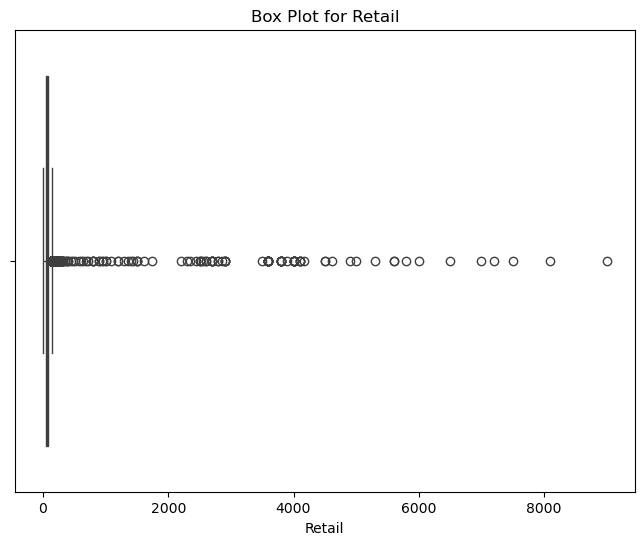

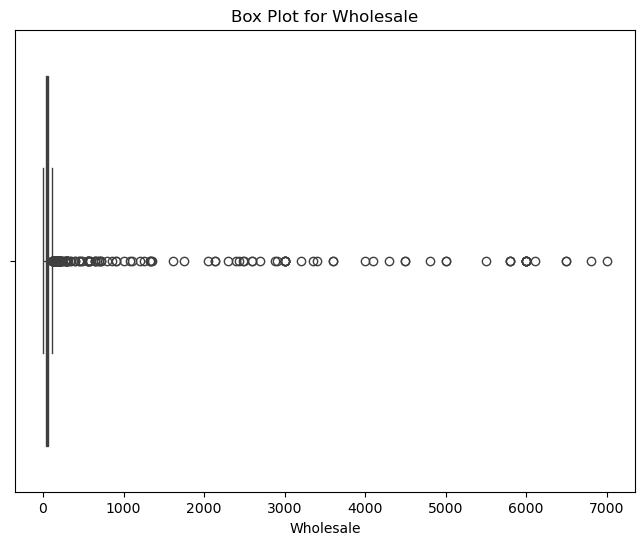

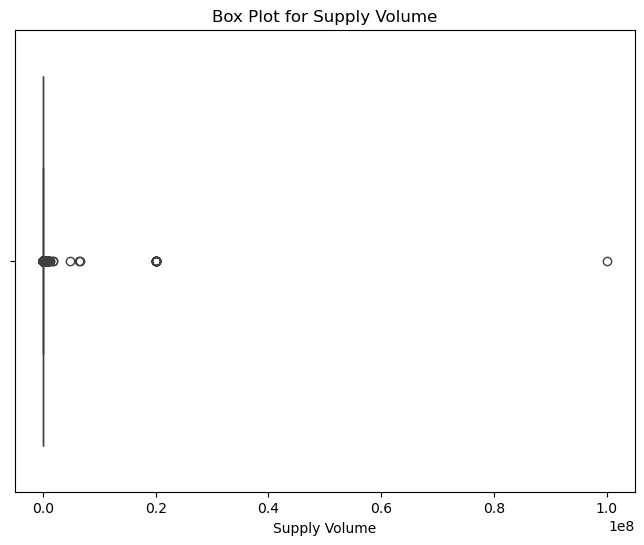

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
# checking for outliers
num_columns = ["Retail", "Wholesale", "Supply Volume"]
for col in num_columns:
  plt.figure(figsize=(8,6))
  sns.boxplot(x = data[col])
  plt.title(f'Box Plot for {col}')
  plt.show()

In [45]:
# Initialize a boolean array with False, indicating no outliers initially
import scipy.stats as stats
outliers = np.zeros(data.shape[0], dtype=bool)

for col in num_columns:
    z_scores = stats.zscore(data[col])
    outliers = outliers | (np.abs(z_scores) > 3) 

outlier_df = data[outliers].reset_index(drop=True)

final_data = data[~outliers]

In [46]:
len(outlier_df)

173

In [47]:
final_data

,Classification,Market,Wholesale,Retail,Supply Volume,County,Date,Market_Ahero,Market_Akala,Market_Amoni,...,County_Taita-Taveta,County_Tana-River,County_Tharaka-Nithi,County_Trans-Nzoia,County_Turkana,County_Uasin-Gishu,County_Vihiga,County_Wajir,County_West-Pokot,County_test
0,Mixed-Traditional,Isebania Market,22.578,32.00,45000.0,Migori,2024-08-27,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,White Maize,Ahero,45.000,50.00,7000.0,Kisumu,2024-08-27,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,White Maize,Nyamakima,44.440,70.00,5860.0,Nairobi,2024-08-27,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,White Maize,Kathonzweni,35.000,40.00,7200.0,Makueni,2024-08-27,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,White Maize,Kawangware,40.000,50.00,6544.0,Nairobi,2024-08-27,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,White Maize,Kongowea,25.560,40.00,2250.0,Mombasa,2021-05-24,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1271,Yellow Maize,Kibuye,44.440,50.00,5800.0,Kisumu,2021-05-24,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1272,NaN,Loitoktok Market,25.560,35.00,9900.0,Kajiado,2021-05-24,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1273,White Maize,Chepseon,24.560,28.33,1800.0,Kericho,2021-05-24,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
final_data.to_csv("clean_data", index = False)